## Data Description

The dataset used in this project is provided on Kaggle and originally collected by Crowdflower’s Data for Everyone library.
https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment/

This Twitter data was scraped on February 2015. It contains tweets on six major United States(US) airlines.

The dataset contains 14640 instances which are tweets submitted by individual travelers and 15 features.And each instance is labeled as positive, negative or neutral.

### Features:

tweet_id: A numeric feature which give the twitter ID of the tweet’s writer.

airline_sentiment: A categorical feature contains labels for tweets, positive, negative or neutral.

airline_sentiment_confidence: A numeric feature representing the confidence level of classifying the tweet to one of the 3 classes.

negativereason: Categorical feature which represent the reason behind considering this tweet as negative.

negativereason_confidence: The level of confidence in determining the negative reason behind the negative tweet.

airline: Name of the airline Company

airline_sentiment_gold

negativereason_gold

retweet_count: Number of retweets of a tweet.

text: Original tweet posted by the user.

tweet_coord: The coordinates of the tweet.

tweet_created: The date and the time of tweet.

tweet_location: From where the tweet was posted.

user_timezone: The timezone of the user.

In [4]:
# Basic Operation
import pandas as pd
import numpy as np

In [ ]:
# Text Preprocessing & Cleaning
from nltk.corpus import stopwords
import missingno as msno
import re
import string
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image

In [ ]:
#!pip install pillow==9.5
#!pip install missingno
#!pip install wordcloud

# 2 Case Study: Twitter US Airline Sentiment

## 2.1 Introduction
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorising negative reasons (such as "late flight" or "rude service").

Analysing how travelers in February 2015 expressed their feelings on Twitter from the dataset.
## 2.2 Data Description
'DataFrame' generally refers to "tabular" data: a data structure representing cases , each of which consists of a number of observations or measurements. Alternatively, each row may be treated as a single observation of multiple "variables".

In [ ]:
df_airline = pd.read_csv('data/Tweets.csv')

In [ ]:
df_airline.head()

In [7]:
df_airline.shape

(14640, 15)

The dataset contains 15 variables and 14640 samples.

In [8]:
df_airline.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

## 2.3 Missing Value
Missing values occur when no information is provided for the item. Seven variables have missing
values.

### Barplot for missing values

<AxesSubplot:>

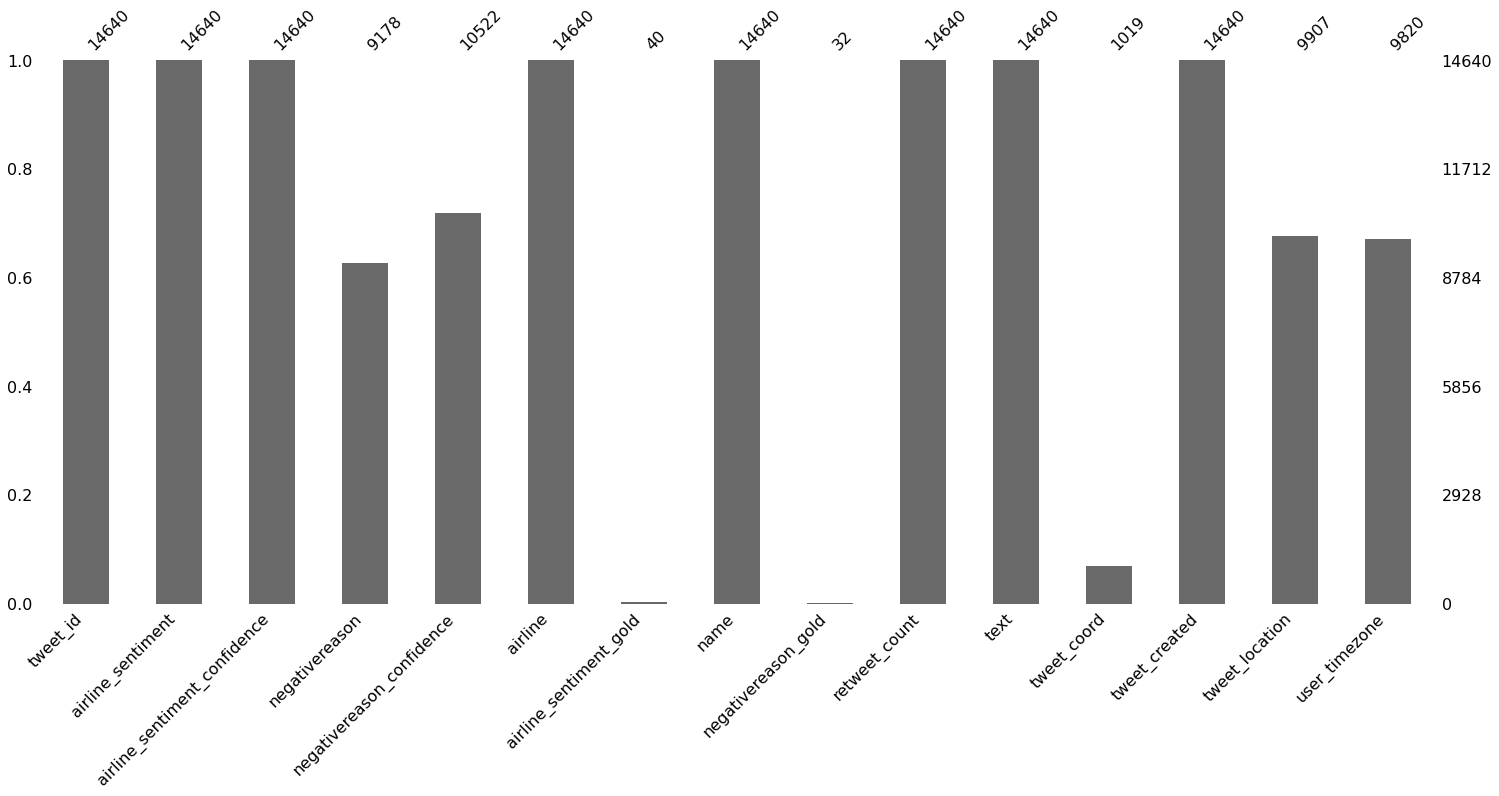

In [9]:
import missingno as msno
msno.bar(df_airline) 

### Heatmap for missing values

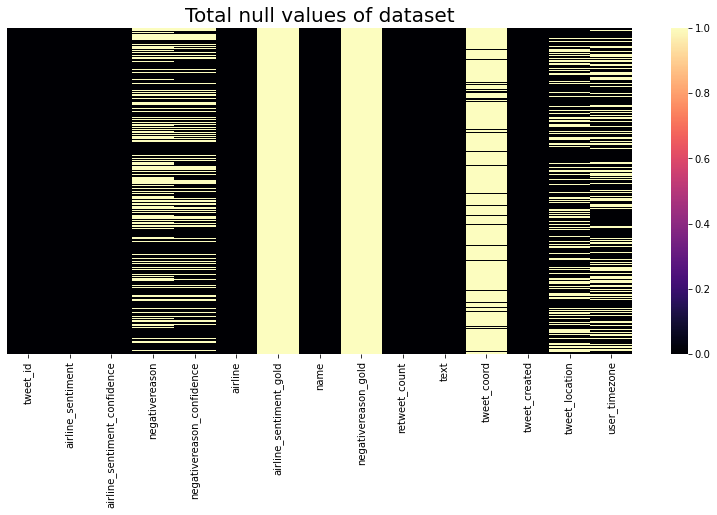

In [10]:
# visualize null values
plt.figure(figsize=(14,6))
sns.heatmap(df_airline.isnull(), yticklabels = False, cmap='magma') 
#Detect missing values for an array-like object; 
#yticklabels: If True, plot the column names of the dataframe. If False, don’t plot the column names. 
#cmap: color of the map
plt.title('Total null values of dataset',size=20);

Drop the variables which have too many missing values.
## 2.3 Data Exploration
The target variable is 'airline_sentiment'. There are three sentiments in target variable, neutral,
positive and negative.
### Tweets Count

In [11]:
df_show = pd.DataFrame(df_airline.groupby('airline_sentiment')['airline_sentiment'].count())
# firstly, group by airline_sentiment, then count airline_sentiment
# same: df_show = pd.DataFrame(df_airline.groupby('airline_sentiment')['tweet_id'].count())
df_show

,airline_sentiment
airline_sentiment,
negative,9178
neutral,3099
positive,2363


In [12]:
df_show.columns = ['count']
df_show

,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


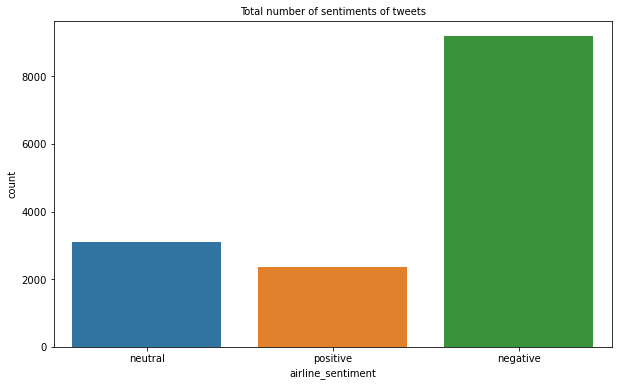

In [13]:
plt.figure(figsize = (10,6))
ax = sns.countplot(data = df_airline, x = 'airline_sentiment')
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 10)
plt.show()

The relationship between other variables and the target variable

### Retweet Count

In [14]:
pd.DataFrame(df_airline.groupby('airline_sentiment')['retweet_count'].sum())

,retweet_count
airline_sentiment,
negative,857
neutral,189
positive,164


### Tweet Created Date

Processing time variable

In [15]:
example_time = df_airline['tweet_created'][0]
print(example_time)

2015-02-24 11:35:52 -0800


It is a string, so we can get the date by the index

In [16]:
print(example_time[0:10])

2015-02-24


In [17]:
df_airline['tweet_created_date'] =  df_airline['tweet_created'].apply(lambda x: x[0:10])
# lambda: The expression x[0:10] is executed and the result is returned
# apply: Apply a function along an axis of the DataFrame.
df_airline['tweet_created_date']

0        2015-02-24
1        2015-02-24
2        2015-02-24
3        2015-02-24
4        2015-02-24
            ...    
14635    2015-02-22
14636    2015-02-22
14637    2015-02-22
14638    2015-02-22
14639    2015-02-22
Name: tweet_created_date, Length: 14640, dtype: object

<AxesSubplot:xlabel='tweet_created_date', ylabel='count'>

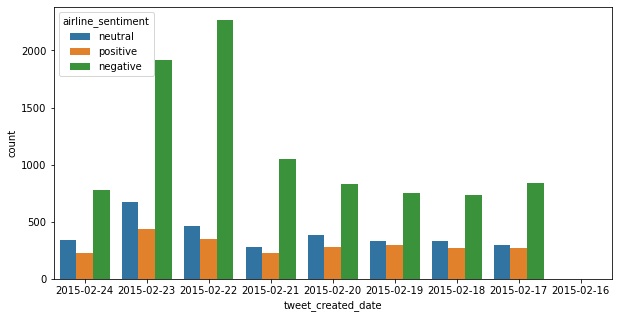

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='tweet_created_date', hue='airline_sentiment', data = df_airline)
# hue: group by

### Group by Airline

In [19]:
df_show = pd.DataFrame(df_airline.groupby('airline')['airline'].count())
df_show.columns = ['count']

In [20]:
df_show

,count
airline,
American,2759
Delta,2222
Southwest,2420
US Airways,2913
United,3822
Virgin America,504


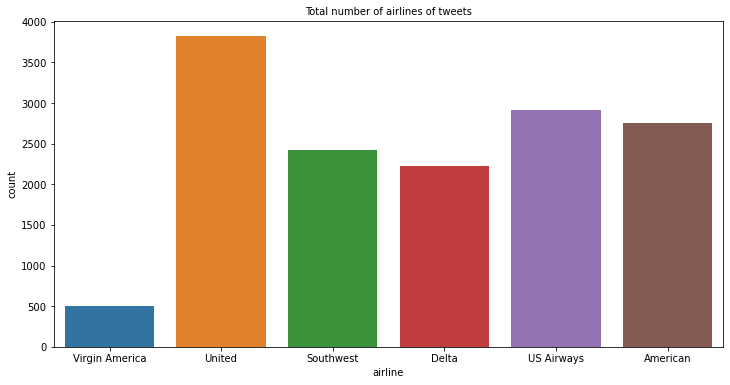

In [21]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'airline', data = df_airline)
ax.set_title(label = 'Total number of airlines of tweets', fontsize = 10)
plt.show()

The pieplot

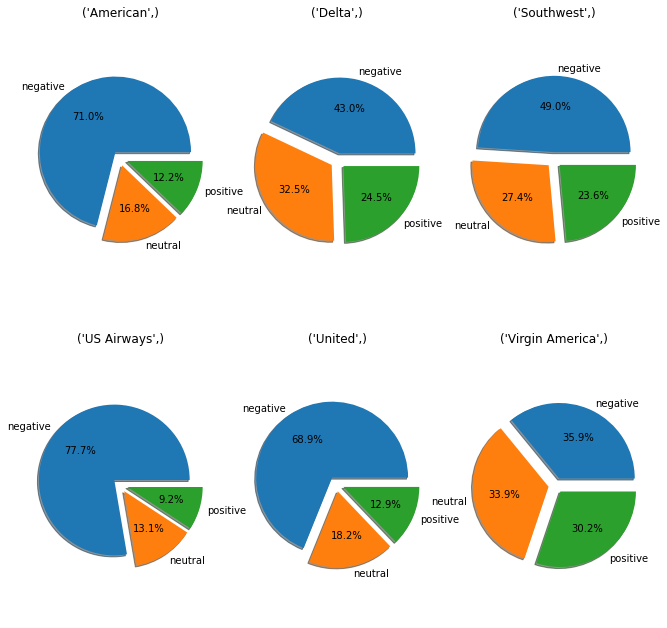

In [22]:
df_show = []
plt.figure(2,figsize=(11, 11))
indices = 0
# x holds the name of the airline (e.g., 'Delta', 'American Airlines'), 
# df_temp is the subset of data corresponding to that airline.
for x,df_temp in df_airline.groupby(['airline'] ):
    df_temp =  pd.DataFrame(df_temp.groupby('airline_sentiment')['airline_sentiment'].count())
    df_temp.columns = [x]
    
    # pie plot
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.2)
    plt.pie(df_temp[x].tolist(),labels = df_temp.index.tolist(),explode=[0.1,0.1,0.1],data=df_temp,shadow=True,autopct='%1.1f%%')
    plt.title(x)
    plt.axis('equal')
    indices = indices + 1
    
    df_temp = pd.DataFrame(df_temp.values.T, index=df_temp.columns, columns=df_temp.index)
    #row sentiment, column airline name, .value.T: matrix transpose
    df_show.append(df_temp)

In [23]:
df_temp

airline_sentiment,negative,neutral,positive
"(Virgin America,)",181,171,152


In [24]:
df_show

[airline_sentiment  negative  neutral  positive
 (American,)            1960      463       336,
 airline_sentiment  negative  neutral  positive
 (Delta,)                955      723       544,
 airline_sentiment  negative  neutral  positive
 (Southwest,)           1186      664       570,
 airline_sentiment  negative  neutral  positive
 (US Airways,)          2263      381       269,
 airline_sentiment  negative  neutral  positive
 (United,)              2633      697       492,
 airline_sentiment  negative  neutral  positive
 (Virgin America,)       181      171       152]

In [25]:
df_show = pd.concat(df_show)
df_show['total'] = df_show.sum(axis = 1)

In [26]:
df_show

airline_sentiment,negative,neutral,positive,total
"(American,)",1960,463,336,2759
"(Delta,)",955,723,544,2222
"(Southwest,)",1186,664,570,2420
"(US Airways,)",2263,381,269,2913
"(United,)",2633,697,492,3822
"(Virgin America,)",181,171,152,504


### Negative Reason

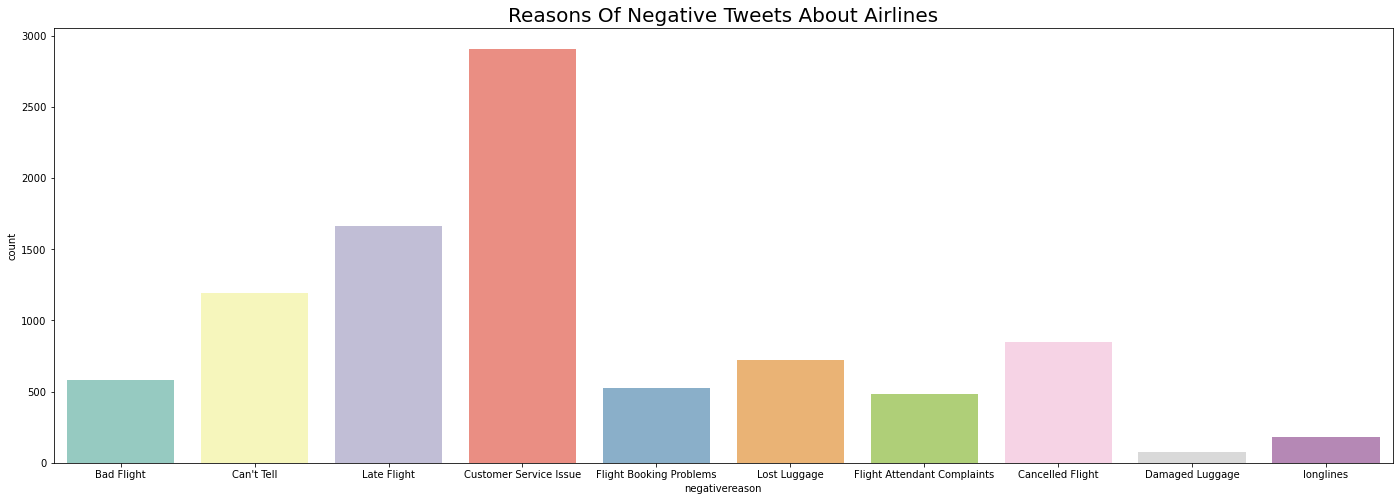

In [27]:
plt.figure(figsize = (24, 8))
sns.countplot(x = 'negativereason', data = df_airline, palette="Set3")
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

## 2.4 Data Cleaning
A regular expression (or RE) specifies a set of strings that matches it; the functions in this module check if a particular string matches a given regular expression

In [28]:
example1 = df_airline['text'][3]
example2 = df_airline['text'][5000]
example3 = df_airline['text'][2]
example4 = df_airline['text'][18]

In [29]:
print(example1)
print(example2)
print(example3)
print(example4)

@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
@SouthwestAir - neveryamind I paid $450 for a flight. 250 for a new bag is easy for business class customers, right? http://t.co/vn3JJIa53O
@VirginAmerica I didn't today... Must mean I need to take another trip!
I ❤️ flying @VirginAmerica. ☺️👍


### Split the sentence by ' ' in English

In [30]:
print(example1.split())
print(example2.split())
print(example3.split())
print(example4.split())

['@VirginAmerica', "it's", 'really', 'aggressive', 'to', 'blast', 'obnoxious', '"entertainment"', 'in', 'your', "guests'", 'faces', '&amp;', 'they', 'have', 'little', 'recourse']
['@SouthwestAir', '-', 'neveryamind', 'I', 'paid', '$450', 'for', 'a', 'flight.', '250', 'for', 'a', 'new', 'bag', 'is', 'easy', 'for', 'business', 'class', 'customers,', 'right?', 'http://t.co/vn3JJIa53O']
['@VirginAmerica', 'I', "didn't", 'today...', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip!']
['I', '❤️', 'flying', '@VirginAmerica.', '☺️👍']


###  Remove Stopwords and Special terms
Removing the noisy terms, such as urls and punctuations, and words such as, "the, a, and, I ,me ,he,she", which have less influnce of sentiment.

#### Stopwords removal

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\la22484\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [33]:
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

In [34]:
print(example1)
print(remove_stopwords(example1))

@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
@VirginAmerica really aggressive blast obnoxious "entertainment" guests' faces &amp; little recourse


#### @username Removal 

In [35]:
def remove_username(text):
    return re.sub('@[^\s]+','',text)
# The pattern as a whole @[^\s]+ matches the "@" followed by the username until the next whitespace (space, tab, or newline).replace @xxx with space

In [36]:
print(example1)
print(remove_username(example1))

@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
 it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse


#### Remove url 

In [37]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

#This pattern is designed to match most common forms of URLs, whether they start with http://, https://, or www.

In [38]:
print(example2)
print(remove_url(example2))

@SouthwestAir - neveryamind I paid $450 for a flight. 250 for a new bag is easy for business class customers, right? http://t.co/vn3JJIa53O
@SouthwestAir - neveryamind I paid $450 for a flight. 250 for a new bag is easy for business class customers, right? 


#### Remove emojis

In [39]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [40]:
print(example4)
print(remove_emoji(example4))

I ❤️ flying @VirginAmerica. ☺️👍
I  flying @VirginAmerica. 


#### Remove punctuation

In [41]:
def remove_punctuation(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [42]:
print(example3)
print(remove_punctuation(example3))

@VirginAmerica I didn't today... Must mean I need to take another trip!
VirginAmerica I didnt today Must mean I need to take another trip


In [43]:
# Remove stop words and special terms
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punctuation(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute


# combaine negative reason with  tweet (if exsist)
df_airline['text_clean'] = df_airline['negativereason'].fillna('') + ' ' + df_airline['text'] 


# Apply functions on tweets
df_airline['text_clean'] = df_airline['text_clean'].apply(lambda x : remove_username(x))
df_airline['text_clean'] = df_airline['text_clean'].apply(lambda x : remove_url(x))
df_airline['text_clean'] = df_airline['text_clean'].apply(lambda x : remove_emoji(x))
df_airline['text_clean'] = df_airline['text_clean'].apply(lambda x : decontraction(x))
df_airline['text_clean'] = df_airline['text_clean'].apply(lambda x : seperate_alphanumeric(x))
df_airline['text_clean'] = df_airline['text_clean'].apply(lambda x : unique_char(cont_rep_char,x))
df_airline['text_clean'] = df_airline['text_clean'].apply(lambda x : char(x))
df_airline['text_clean'] = df_airline['text_clean'].apply(lambda x : x.lower())
df_airline['text_clean'] = df_airline['text_clean'].apply(lambda x : remove_stopwords(x))

In [44]:
df_airline['text_clean'] 

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        bad flight really aggressive blast obnoxious e...
4                             ca tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    customer service issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    customer service issue money change flight ans...
14639    ppl need know many seats next flight plz put u...
Name: text_clean, Length: 14640, dtype: object

In [45]:
# Split text of Sentiments    
positive = df_airline[df_airline['airline_sentiment'] == 'positive'].text_clean
neutral  = df_airline[df_airline['airline_sentiment'] == 'neutral'].text_clean
negative  = df_airline[df_airline['airline_sentiment'] == 'negative'].text_clean

In [46]:
from PIL import Image

In [47]:
background = Image.open("background_1.png")
graph = np.array(background)

(-0.5, 503.5, 495.5, -0.5)

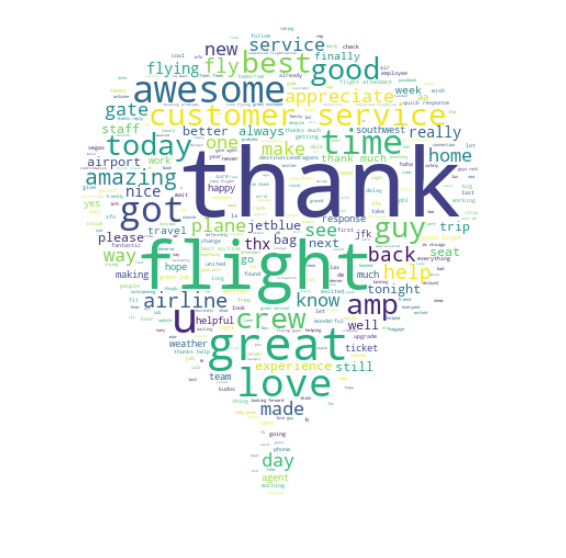

In [48]:
# worldcould of positive sentiments
plt.figure(figsize = (15,10)) 
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 2000 , width = 1600 , height = 680, 
                       prefer_horizontal = 1, background_color="white", 
                       mask=graph).generate(" ".join(positive))
plt.imshow(worldcould_pos,interpolation = 'bilinear')

plt.axis("off")

(-0.5, 503.5, 495.5, -0.5)

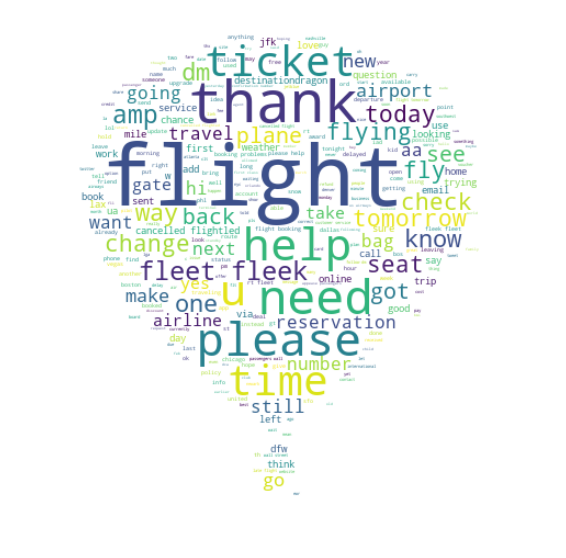

In [49]:
# worldcould of neutral sentiments
plt.figure(figsize = (15,10)) 
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 2000 , width = 1600 , height = 680, 
                           prefer_horizontal = 1,background_color="white", 
                       mask=graph).generate(" ".join(neutral))
plt.imshow(worldcould_pos,interpolation = 'bilinear')

plt.axis("off")

(-0.5, 503.5, 495.5, -0.5)

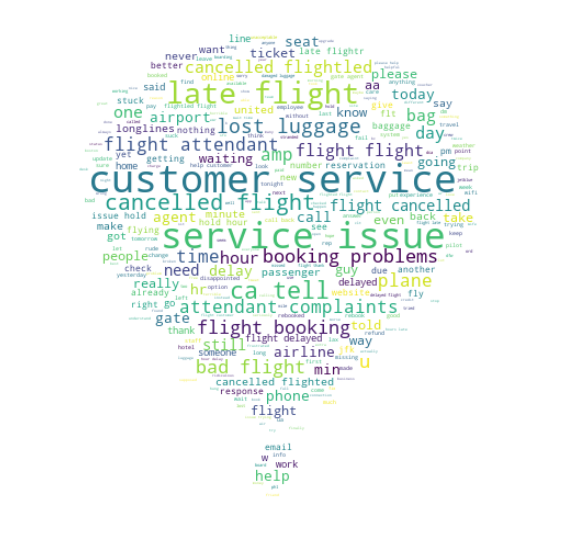

In [50]:
# worldcould of negative sentiments
plt.figure(figsize = (15,10))
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 2000 , width = 1600 , height = 680, 
                           prefer_horizontal = 1, background_color="white", 
                       mask=graph).generate(" ".join(negative))
plt.imshow(worldcould_pos,interpolation = 'bilinear')

plt.axis("off")

In [51]:
# worldcould of different airline
American = df_airline[df_airline['airline'] == 'American'].text_clean
Southwest = df_airline[df_airline['airline'] == 'Southwest'].text_clean

In [52]:
background = Image.open("background_3.png")
graph_2 = np.array(background)

(-0.5, 1074.5, 429.5, -0.5)

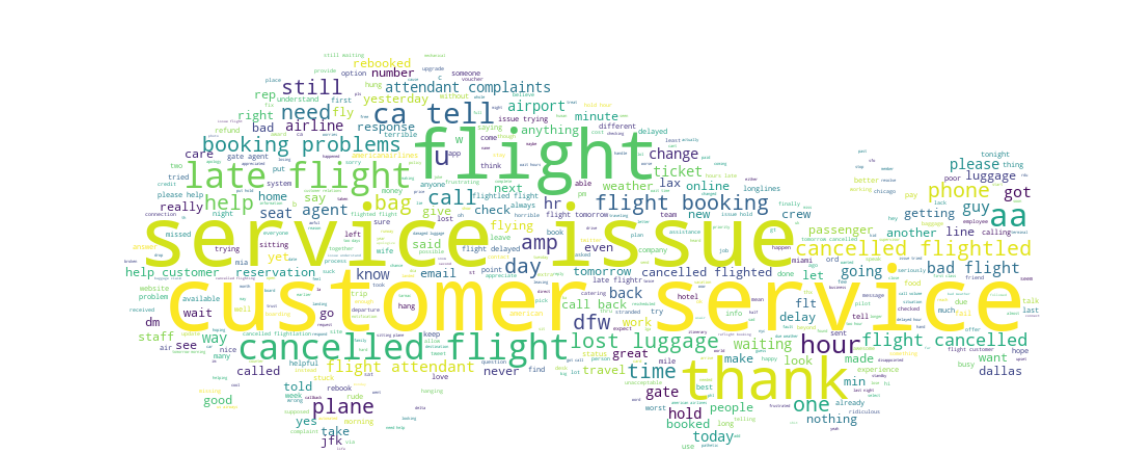

In [53]:
# world could of American Airline
plt.figure(figsize = (20,20)) 
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 2000 , width = 1600 , height = 680, 
                           prefer_horizontal = 1,background_color="white", 
                       mask=graph_2).generate(" ".join(American))
plt.imshow(worldcould_pos,interpolation = 'bilinear')

plt.axis("off")

(-0.5, 1074.5, 429.5, -0.5)

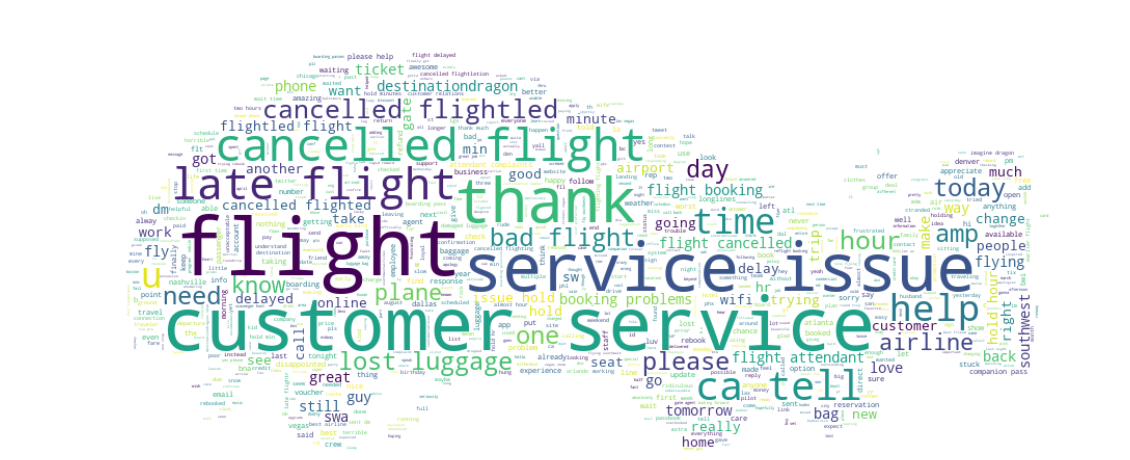

In [54]:
# worldcould of Southwest Airline
plt.figure(figsize = (20,20)) 
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 2000 , width = 1600 , height = 680, 
                           background_color="white",
                       mask=graph_2).generate(" ".join(Southwest))
plt.imshow(worldcould_pos,interpolation = 'bilinear')

plt.axis("off")